In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for dataset, preprocessing, model training, and evaluation
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# EDA

In [19]:
# Load the dataset
car = pd.read_csv('car data.csv.xls')

# Display the first few rows of the dataset
print("First five rows of the dataset:")
print(car.head())

# Basic information about the dataset
print("\nDataset Information:")
car.info()

# Check for missing values
print("\nMissing Values:")
print(car.isnull().sum()) # we have no missing values 

# Summary statistics
print("\nSummary Statistics:")
print(car.describe())


car['Age'] = 2024 - car['Year'] 
car.drop('Year',axis=1,inplace = True)


car.drop(labels='Car_Name',axis= 1, inplace = True)
car.head()

First five rows of the dataset:
  Car_Name  Year  Selling_Price  Present_Price  Kms_Driven Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Seller_Type Transmission  Owner  
0      Dealer       Manual      0  
1      Dealer       Manual      0  
2      Dealer       Manual      0  
3      Dealer       Manual      0  
4      Dealer       Manual      0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Pric

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,10
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,11
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,7
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,13
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,10


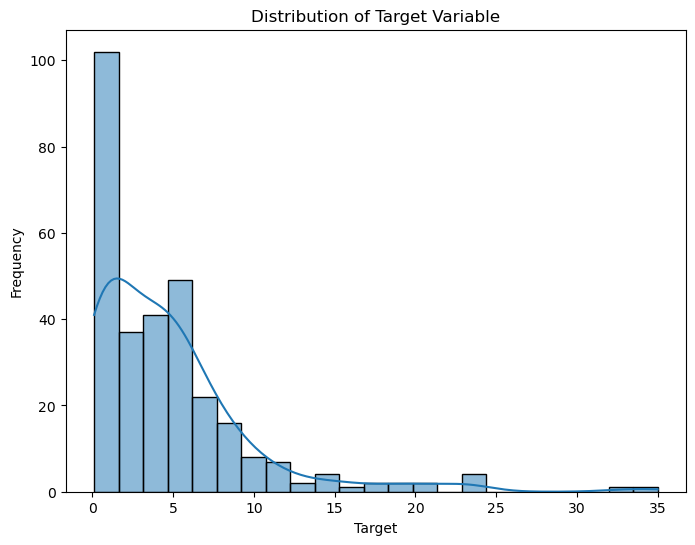

In [20]:
# Visualizations

# 1. Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(car['Selling_Price'], kde=True)  # Assuming the last column is the target variable
plt.title("Distribution of Target Variable")
plt.xlabel("Target")
plt.ylabel("Frequency")
plt.show()

/var/folders/95/z0l4pm750c5g96530n99ybt40000gn/T/ipykernel_26313/4215586106.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(car.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


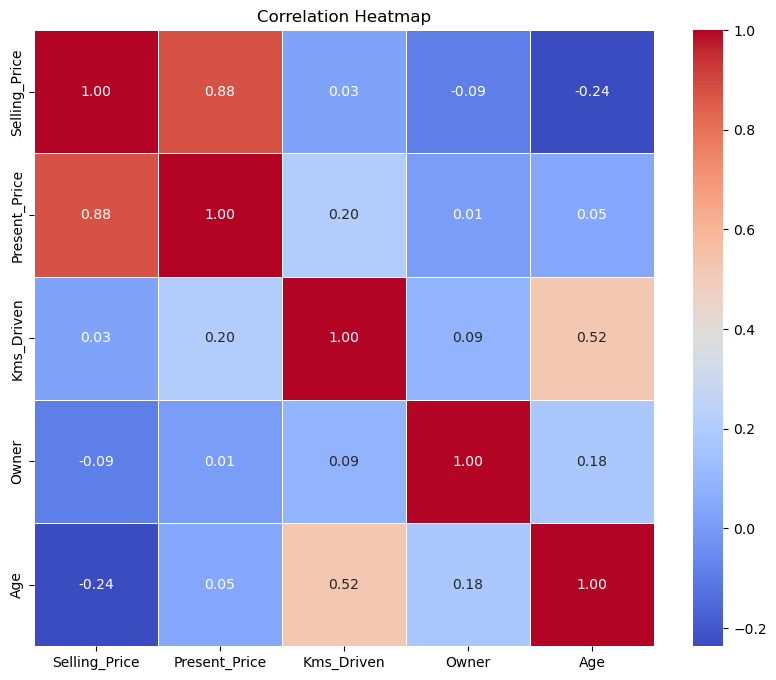

In [21]:
# 2. Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(car.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

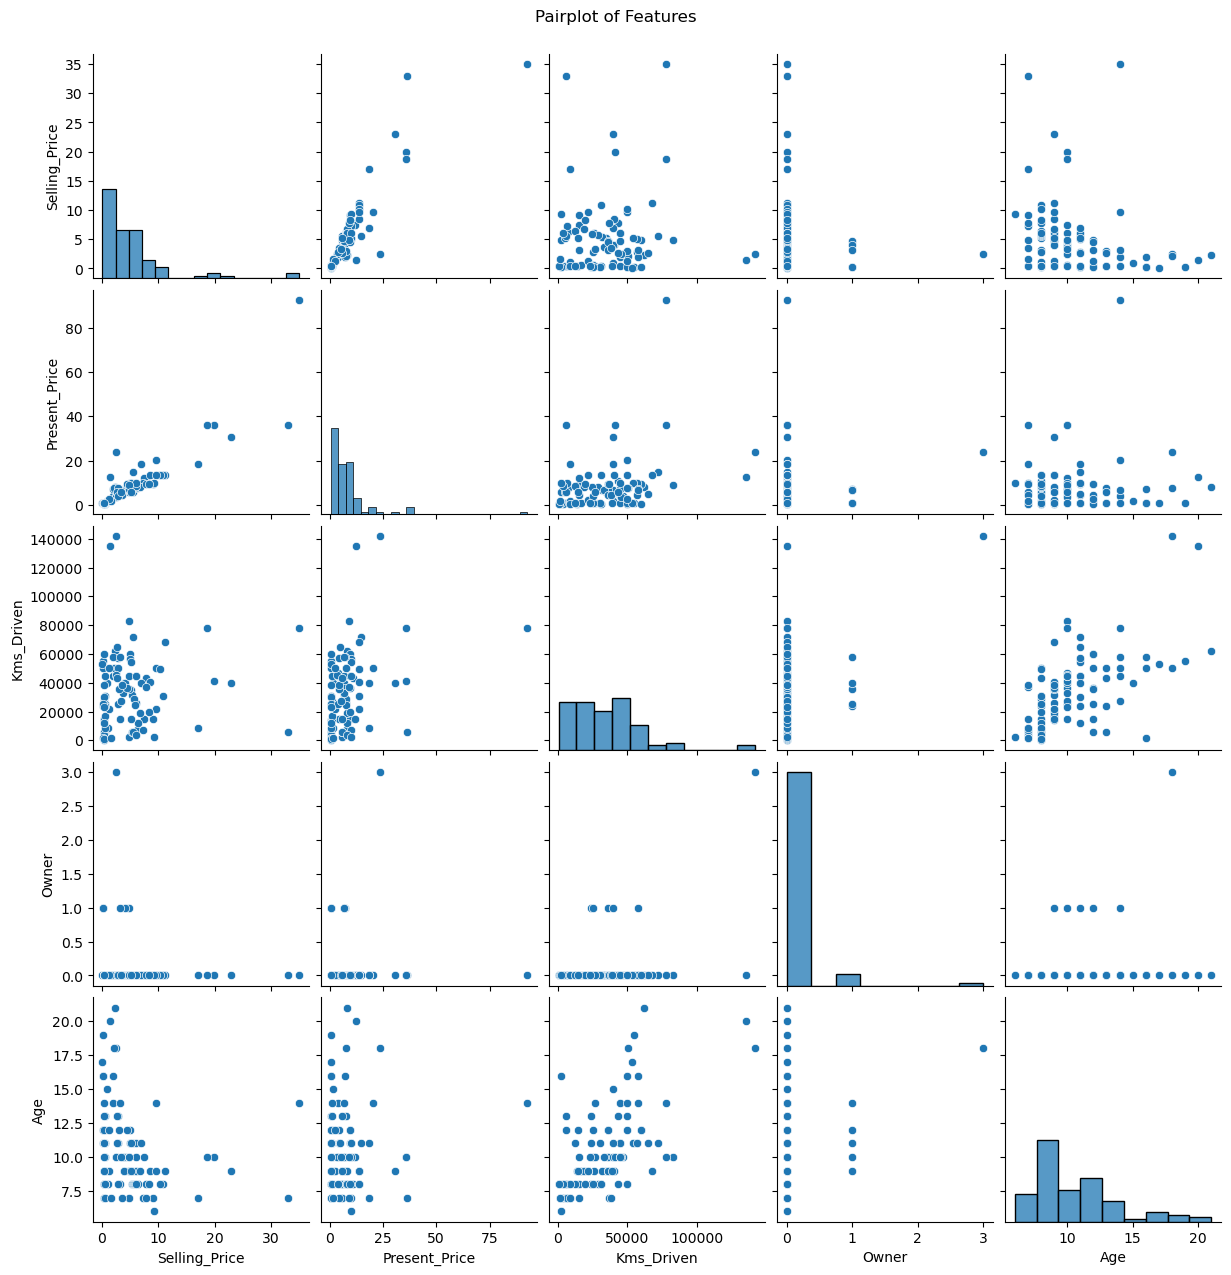

In [22]:
# 3. Pairplot of Features (useful for small datasets; might need to sample if the dataset is large)
# Replace `sample(100)` with a suitable sample size if the dataset is large, or remove it if the dataset is small
sns.pairplot(car.sample(100))
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

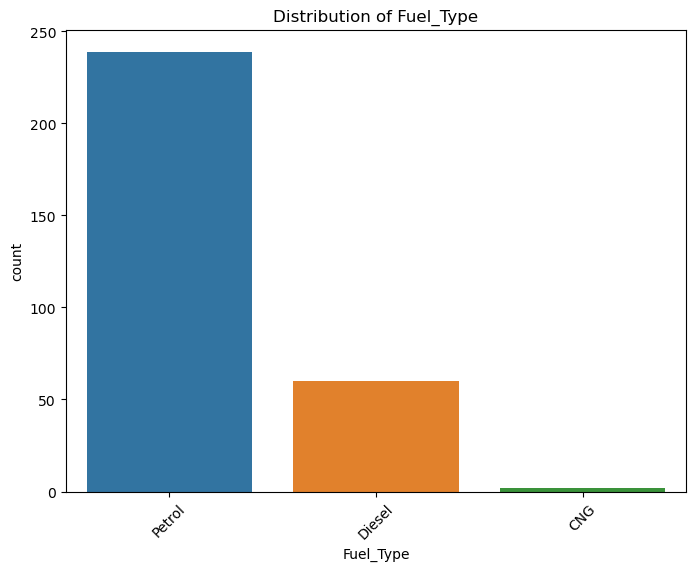

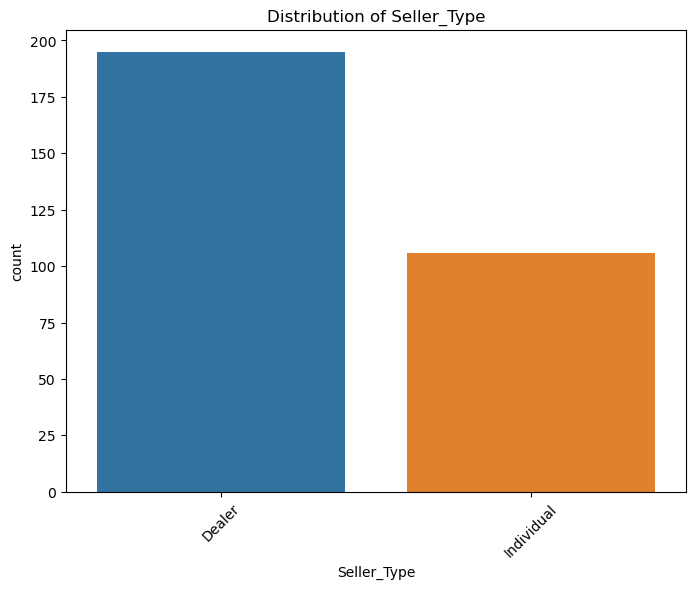

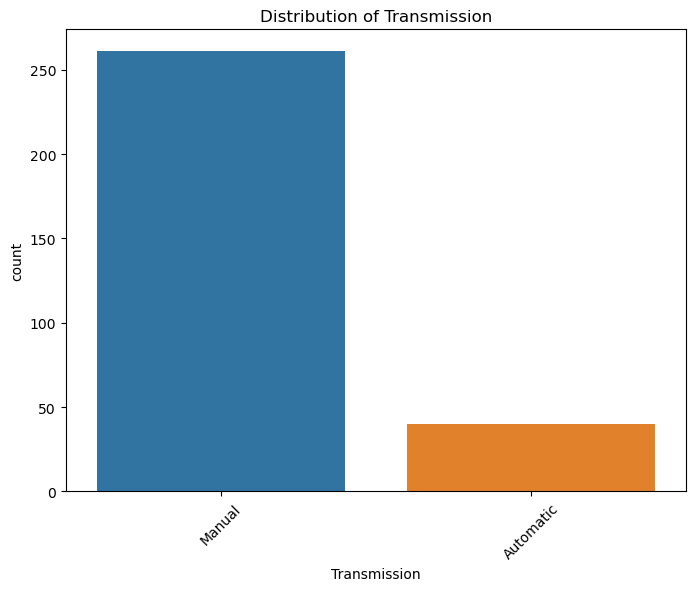

In [23]:
# 4. Check distribution of categorical features
categorical_columns = car.select_dtypes(include=["object"]).columns
for column in categorical_columns:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=column, data=car)
    plt.title(f"Distribution of {column}")
    plt.xticks(rotation=45)
    plt.show()

# Training and Preprocessing 

In [24]:
print(car['Seller_Type'].unique())
print(car['Fuel_Type'].unique())
print(car['Transmission'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
['Manual' 'Automatic']


In [25]:
car = pd.get_dummies(data = car,drop_first=True) 
car.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,10,0,1,0,1
1,4.75,9.54,43000,0,11,1,0,0,1
2,7.25,9.85,6900,0,7,0,1,0,1
3,2.85,4.15,5200,0,13,0,1,0,1
4,4.60,6.87,42450,0,10,1,0,0,1


In [26]:
car.isna().sum() # No Missing Data

Selling_Price             0
Present_Price             0
Kms_Driven                0
Owner                     0
Age                       0
Fuel_Type_Diesel          0
Fuel_Type_Petrol          0
Seller_Type_Individual    0
Transmission_Manual       0
dtype: int64

In [27]:
# Separating features and target variable
y = car.pop('Selling_Price')
X = car

In [28]:
# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

# Step 2: Data Preprocessing
# Scaling the data for consistency across features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [29]:
# Define a function to evaluate models
def evaluate_model(y_true, y_pred):
    """
    Calculates evaluation metrics for a regression model.
    """
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

In [30]:
# Step 3: Train and Evaluate Linear Regression (Baseline Model)
lin_reg = LinearRegression()
lin_reg.fit(X_train_scaled, y_train)
y_pred_lin = lin_reg.predict(X_test_scaled)
mae_lin, mse_lin, rmse_lin, r2_lin = evaluate_model(y_test, y_pred_lin)


print("\nBaseline Model - Linear Regression:")
print(f"MAE: {mae_lin}, MSE: {mse_lin}, RMSE: {rmse_lin}, R-squared: {r2_lin}")


Baseline Model - Linear Regression:
MAE: 1.2698356709065524, MSE: 3.5417485009492005, RMSE: 1.8819533737447378, R-squared: 0.8756155246204997


# Model Tuning, Evaluation, and Analysis 

In [41]:
# Step 4: Model Tuning - Polynomial Regression (Degree 2)
# Adding polynomial features (degree = 2)
poly_degree_2 = PolynomialFeatures(degree=2)
X_train_poly_2 = poly_degree_2.fit_transform(X_train_scaled)
X_test_poly_2 = poly_degree_2.transform(X_test_scaled)

# Train a Polynomial Regression model (Degree 2)
poly_model_2 = LinearRegression()
poly_model_2.fit(X_train_poly_2, y_train)
y_pred_poly_2 = poly_model_2.predict(X_test_poly_2)

# Evaluate the Polynomial Regression model (Degree 2)
mae_poly_2, mse_poly_2, rmse_poly_2, r2_poly_2 = evaluate_model(y_test, y_pred_poly_2)

print("\nModel Tuning - Polynomial Regression (Degree 2):")
print(f"MAE: {mae_poly_2}, MSE: {mse_poly_2}, RMSE: {rmse_poly_2}, R-squared: {r2_poly_2}")

# Step 4: Model Tuning - Polynomial Regression (Degree 3)
# Adding polynomial features (degree = 3)
poly_degree_3 = PolynomialFeatures(degree=3)
X_train_poly_3 = poly_degree_3.fit_transform(X_train_scaled)
X_test_poly_3 = poly_degree_3.transform(X_test_scaled)

# Train a Polynomial Regression model (Degree 3)
poly_model_3 = LinearRegression()
poly_model_3.fit(X_train_poly_3, y_train)
y_pred_poly_3 = poly_model_3.predict(X_test_poly_3)

# Evaluate the Polynomial Regression model (Degree 3)
mae_poly_3, mse_poly_3, rmse_poly_3, r2_poly_3 = evaluate_model(y_test, y_pred_poly_3)

print("\nModel Tuning - Polynomial Regression (Degree 3):")
print(f"MAE: {mae_poly_3}, MSE: {mse_poly_3}, RMSE: {rmse_poly_3}, R-squared: {r2_poly_3}")



Model Tuning - Polynomial Regression (Degree 2):
MAE: 0.9366118646978022, MSE: 3.021170829840021, RMSE: 1.738151555486466, R-squared: 0.8938979578587276

Model Tuning - Polynomial Regression (Degree 3):
MAE: 311473655.58469564, MSE: 4.772672106114925e+18, RMSE: 2184644617.8074193, R-squared: -1.676139104508353e+17


In [46]:
# Step 5: Algorithm Comparison - Additional Algorithms for Comparison

# 5.1 Ridge Regression with different alpha values
alpha_values_ridge = [0.01, 0.1, 1.0, 10.0, 100.0]
ridge_results = []

for alpha in alpha_values_ridge:
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train_scaled, y_train)
    y_pred_ridge = ridge_reg.predict(X_test_scaled)
    mae_ridge, mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)
    ridge_results.append((alpha, mae_ridge, mse_ridge, rmse_ridge, r2_ridge))

ridge_results_df = pd.DataFrame(ridge_results, columns=["Alpha", "MAE", "MSE", "RMSE", "R-squared"])
print("Ridge Regression Results with Different Alphas:")
print(ridge_results_df)

# 5.2 Lasso Regression with different alpha values
alpha_values_lasso = [0.01, 0.1, 0.5, 1.0, 5.0]
lasso_results = []

for alpha in alpha_values_lasso:
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train_scaled, y_train)
    y_pred_lasso = lasso_reg.predict(X_test_scaled)
    mae_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)
    lasso_results.append((alpha, mae_lasso, mse_lasso, rmse_lasso, r2_lasso))

lasso_results_df = pd.DataFrame(lasso_results, columns=["Alpha", "MAE", "MSE", "RMSE", "R-squared"])
print("Lasso Regression Results with Different Alphas:")
print(lasso_results_df)


Ridge Regression Results with Different Alphas:
    Alpha       MAE       MSE      RMSE  R-squared
0    0.01  1.269855  3.541933  1.882003   0.875609
1    0.10  1.270028  3.543603  1.882446   0.875550
2    1.00  1.271840  3.560747  1.886994   0.874948
3   10.00  1.293077  3.754029  1.937532   0.868160
4  100.00  1.513273  5.894330  2.427824   0.792994
Lasso Regression Results with Different Alphas:
   Alpha       MAE        MSE      RMSE  R-squared
0   0.01  1.270540   3.553047  1.884953   0.875219
1   0.10  1.294761   3.751357  1.936842   0.868254
2   0.50  1.484425   5.292386  2.300519   0.814134
3   1.00  1.953444   7.910610  2.812581   0.722183
4   5.00  3.727929  28.559037  5.344066  -0.002979


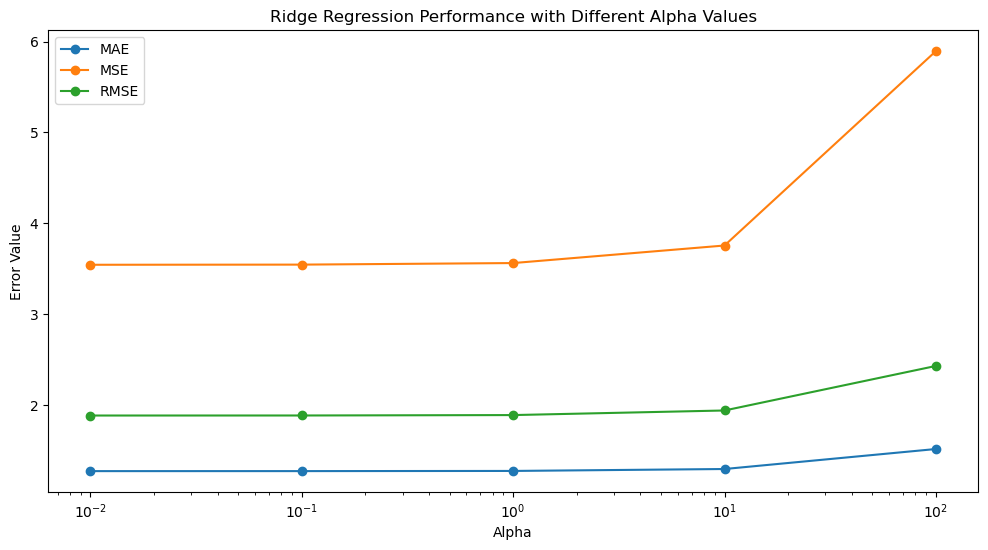

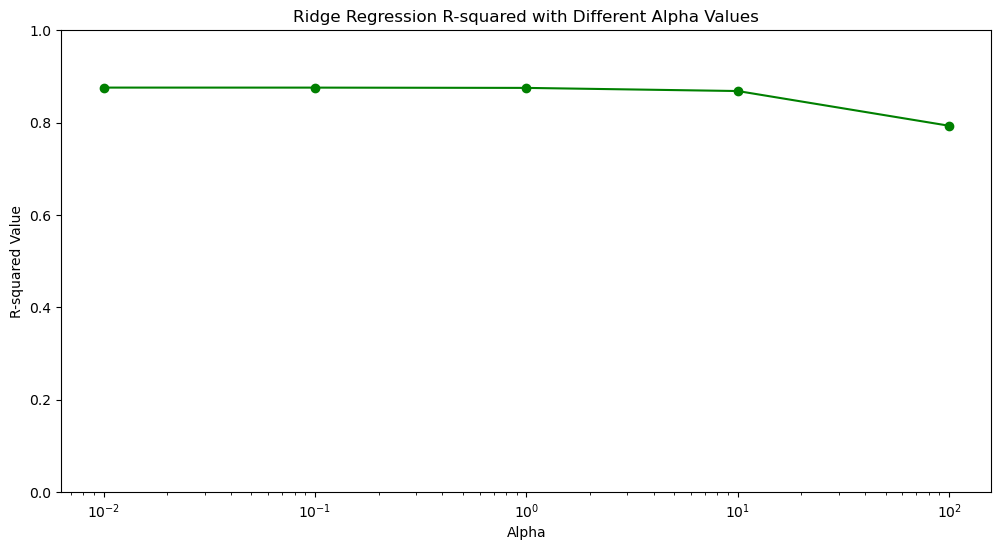

In [47]:
# Plotting Ridge Regression results
ridge_results_df.set_index("Alpha")[["MAE", "MSE", "RMSE"]].plot(kind="line", figsize=(12, 6), marker='o')
plt.title("Ridge Regression Performance with Different Alpha Values")
plt.ylabel("Error Value")
plt.xlabel("Alpha")
plt.xscale("log")
plt.show()

ridge_results_df.set_index("Alpha")["R-squared"].plot(kind="line", figsize=(12, 6), color='green', marker='o')
plt.title("Ridge Regression R-squared with Different Alpha Values")
plt.ylabel("R-squared Value")
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylim(0, 1)
plt.show()


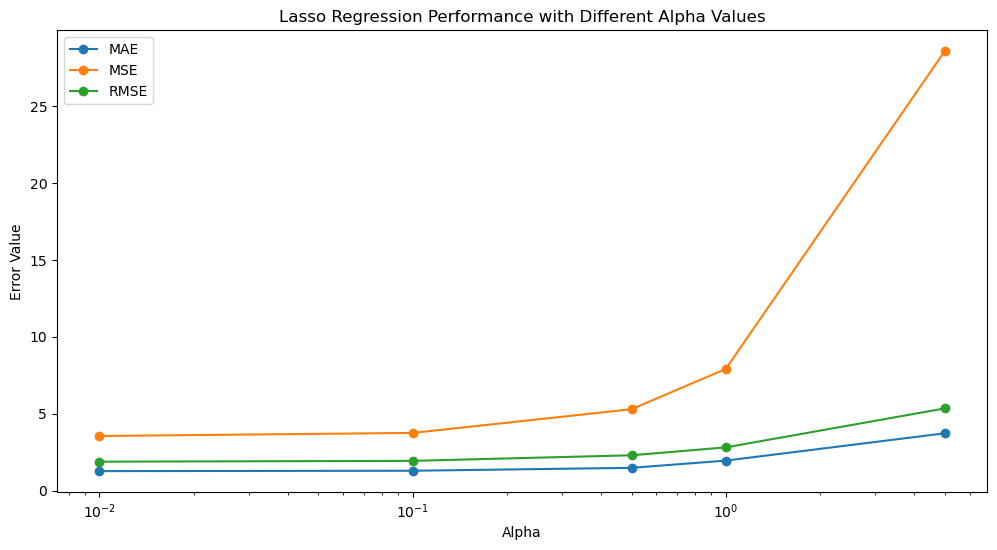

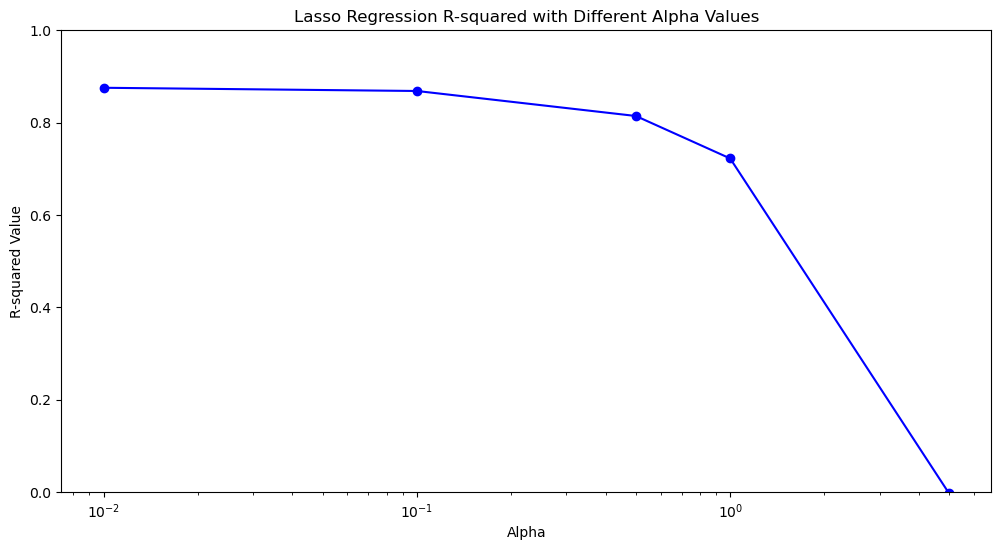

In [35]:
# Plotting Lasso Regression results
lasso_results_df.set_index("Alpha")[["MAE", "MSE", "RMSE"]].plot(kind="line", figsize=(12, 6), marker='o')
plt.title("Lasso Regression Performance with Different Alpha Values")
plt.ylabel("Error Value")
plt.xlabel("Alpha")
plt.xscale("log")
plt.show()

lasso_results_df.set_index("Alpha")["R-squared"].plot(kind="line", figsize=(12, 6), color='blue', marker='o')
plt.title("Lasso Regression R-squared with Different Alpha Values")
plt.ylabel("R-squared Value")
plt.xlabel("Alpha")
plt.xscale("log")
plt.ylim(0, 1)
plt.show()


In [36]:

# Step 5: Algorithm Comparison - Additional Algorithms for Comparison

## 5.1 Ridge Regression
ridge_reg = Ridge(alpha=0.1)  # Beat alpha Depending on the test above
ridge_reg.fit(X_train_scaled, y_train)
y_pred_ridge = ridge_reg.predict(X_test_scaled)
mae_ridge, mse_ridge, rmse_ridge, r2_ridge = evaluate_model(y_test, y_pred_ridge)

## 5.2 Lasso Regression
lasso_reg = Lasso(alpha=0.1) # Beat alpha Depending on the test above
lasso_reg.fit(X_train_scaled, y_train)
y_pred_lasso = lasso_reg.predict(X_test_scaled)
mae_lasso, mse_lasso, rmse_lasso, r2_lasso = evaluate_model(y_test, y_pred_lasso)

# Algorithm Comparison and Discussion 

In [43]:
# Step 6: Collect and Display Metrics in a Table
metrics = {
    "Model": [
        "Linear Regression",
        "Polynomial Regression (Degree 2)",
        "Polynomial Regression (Degree 3)",  # Added Degree 3
        "Ridge Regression",
        "Lasso Regression"
    ],
    "MAE": [mae_lin, mae_poly, mae_poly_3, mae_ridge, mae_lasso],
    "MSE": [mse_lin, mse_poly, mse_poly_3, mse_ridge, mse_lasso],
    "RMSE": [rmse_lin, rmse_poly, rmse_poly_3, rmse_ridge, rmse_lasso],
    "R-squared": [r2_lin, r2_poly, r2_poly_3, r2_ridge, r2_lasso]
}
metrics_df = pd.DataFrame(metrics)


metrics_df.style.format({
    "MAE": "{:.4f}",
    "MSE": "{:.4f}",
    "RMSE": "{:.4f}",
    "R-squared": "{:.4f}"
})


,Model,MAE,MSE,RMSE,R-squared
0,Linear Regression,1.2698,3.5417,1.8820,0.8756
1,Polynomial Regression (Degree 2),0.9366,3.0212,1.7382,0.8939
2,Polynomial Regression (Degree 3),311473655.5847,4772672106114924544.0000,2184644617.8074,-167613910450835296.0000
3,Ridge Regression,1.2700,3.5436,1.8824,0.8756
4,Lasso Regression,1.2948,3.7514,1.9368,0.8683


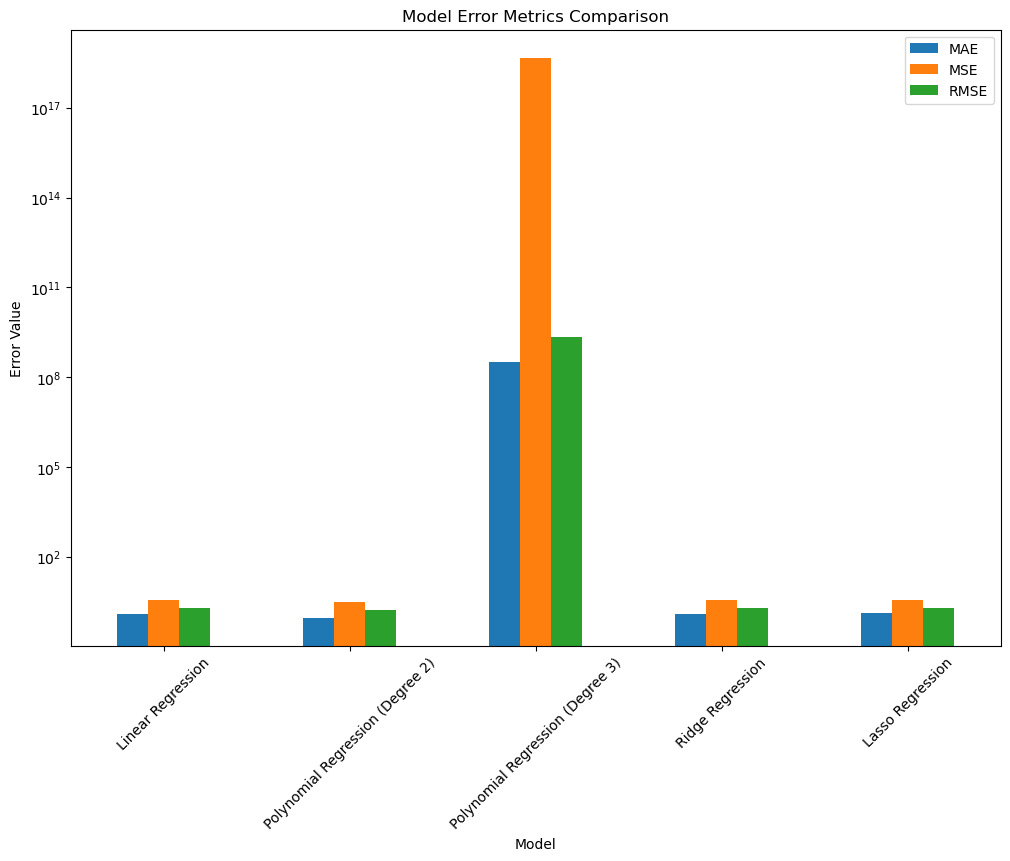

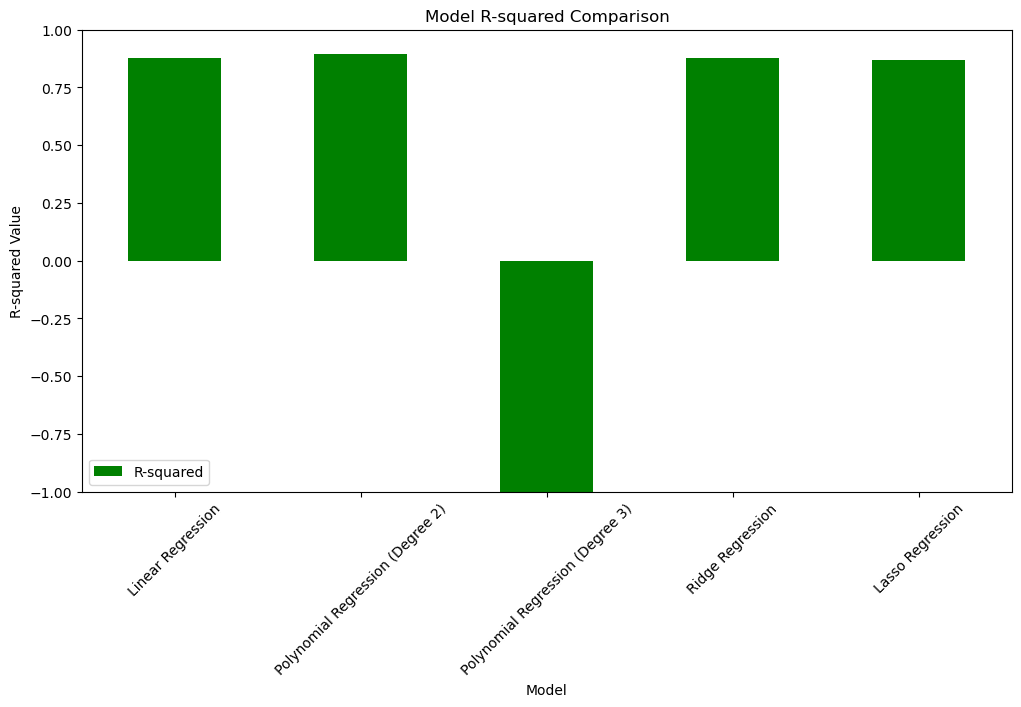

In [44]:
# Step 7: Visualization of the Comparison
## 7.1 Plot Error Metrics
metrics_df.set_index("Model")[["MAE", "MSE", "RMSE"]].plot(kind="bar", figsize=(12, 8))
plt.title("Model Error Metrics Comparison")
plt.ylabel("Error Value")
plt.xticks(rotation=45)
plt.yscale("log")  # Log scale can be used to handle extreme values like Degree 3's error
plt.show()

## 7.2 Plot R-squared Values
metrics_df.set_index("Model")[["R-squared"]].plot(kind="bar", figsize=(12, 6), color='green')
plt.title("Model R-squared Comparison")
plt.ylabel("R-squared Value")
plt.xticks(rotation=45)
plt.ylim(-1, 1)  # Adjusted to account for negative R-squared of Degree 3
plt.show()


In [45]:
discussion_text = """
Discussion:
1. **Linear Regression**: This baseline model has reasonable performance with an R-squared of 0.876 and a relatively low RMSE of 1.88. However, it lacks the ability to capture non-linear relationships, which might limit its accuracy.
   
2. **Polynomial Regression (Degree 2)**: As expected, adding polynomial features improved performance, resulting in the lowest MAE (0.94), MSE (3.02), and RMSE (1.74) among all models. This model also achieved the highest R-squared (0.894), suggesting that the polynomial terms helped capture non-linear patterns in the data effectively, making it the best-performing model overall.

3. **Polynomial Regression (Degree 3)**: Introducing higher-degree polynomial terms led to severe overfitting, with an extremely high RMSE (2.18 × 10⁹) and a large negative R-squared (-1.676 × 10¹⁷). These results indicate that the model became unstable and failed to generalize, making it unsuitable for this dataset.

4. **Ridge Regression**: With an R-squared of 0.875 and RMSE close to Linear Regression, Ridge Regression did not show a significant improvement over the baseline. The L2 regularization helped stabilize coefficients, but it did not capture non-linear relationships as effectively as Polynomial Regression (Degree 2).

5. **Lasso Regression**: Lasso Regression had the lowest R-squared (0.868) and the highest RMSE (1.94) among the models, indicating that the L1 regularization might have set some coefficients to zero, leading to a simpler model but at the cost of accuracy.

**Performance Summary**:
- **Polynomial Regression (Degree 2)** clearly outperformed other models, showing that non-linear terms can enhance prediction accuracy in this dataset.
- **Polynomial Regression (Degree 3)** demonstrated that adding excessive complexity can lead to overfitting and poor performance.
- **Ridge and Lasso Regression** added regularization benefits but did not improve accuracy compared to the baseline Linear Regression. In fact, Lasso Regression's feature selection may have resulted in a simpler but less accurate model.

This analysis indicates that Polynomial Regression (Degree 2) provides the best balance of capturing complex patterns while maintaining generalizability in this dataset.
"""
print(discussion_text)



Discussion:
1. **Linear Regression**: This baseline model has reasonable performance with an R-squared of 0.876 and a relatively low RMSE of 1.88. However, it lacks the ability to capture non-linear relationships, which might limit its accuracy.
   
2. **Polynomial Regression (Degree 2)**: As expected, adding polynomial features improved performance, resulting in the lowest MAE (0.94), MSE (3.02), and RMSE (1.74) among all models. This model also achieved the highest R-squared (0.894), suggesting that the polynomial terms helped capture non-linear patterns in the data effectively, making it the best-performing model overall.

3. **Polynomial Regression (Degree 3)**: Introducing higher-degree polynomial terms led to severe overfitting, with an extremely high RMSE (2.18 × 10⁹) and a large negative R-squared (-1.676 × 10¹⁷). These results indicate that the model became unstable and failed to generalize, making it unsuitable for this dataset.

4. **Ridge Regression**: With an R-squared of

In [48]:
conclusion_text = """
Conclusion:
The project demonstrated the effectiveness of different regression techniques on the car dataset, aiming to predict car metrics accurately. Starting with Linear Regression as the baseline, we found that Polynomial Regression (Degree 2) outperformed other models, likely due to its ability to capture non-linear relationships in the data.

Key takeaways:
- **Polynomial Regression (Degree 2)** achieved the best performance, with the lowest error metrics and the highest R-squared. Adding polynomial terms improved the model’s ability to capture complex relationships while maintaining generalizability.
- **Polynomial Regression (Degree 3)** performed poorly due to severe overfitting, as the higher-degree terms caused instability and failed to generalize.
- **Ridge and Lasso Regression** offered regularization benefits but did not yield better accuracy than the baseline Linear Regression. Lasso's feature selection capability simplified the model but at a loss of predictive power.

This study highlights that adding polynomial terms up to an optimal degree (e.g., Degree 2) can be an effective tuning method for capturing non-linear patterns in car data, ultimately enhancing model accuracy.
"""
print(conclusion_text)



Conclusion:
The project demonstrated the effectiveness of different regression techniques on the car dataset, aiming to predict car metrics accurately. Starting with Linear Regression as the baseline, we found that Polynomial Regression (Degree 2) outperformed other models, likely due to its ability to capture non-linear relationships in the data.

Key takeaways:
- **Polynomial Regression (Degree 2)** achieved the best performance, with the lowest error metrics and the highest R-squared. Adding polynomial terms improved the model’s ability to capture complex relationships while maintaining generalizability.
- **Polynomial Regression (Degree 3)** performed poorly due to severe overfitting, as the higher-degree terms caused instability and failed to generalize.
- **Ridge and Lasso Regression** offered regularization benefits but did not yield better accuracy than the baseline Linear Regression. Lasso's feature selection capability simplified the model but at a loss of predictive power.
